In [1]:


import numpy as np 
import pandas as pd 





In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("D:/tos_dataset/ans16.1.csv",encoding='utf8')

df.head()

,Unnamed: 0,clauses,fairness level
0,0,"['servic', 'sell', 'person', 'data']",0
1,1,"['servic', 'warn', 'user', 'websit', 'mainten']",0
2,2,"['request', 'access', 'delet', 'person', 'data']",0
3,3,"['user', 'inform', 'secur', 'practic']",0
4,4,"['servic', 'provid', 'complaint', 'mechan', 'h...",0


In [4]:
df.groupby('fairness level').describe()

Unnamed: 0                                                
                    count         mean         std  min    25%     50%   
fairness level                                                           
0                   748.0  1019.558824  460.724923  0.0  616.5  1212.5  \
1                   839.0   591.014303  348.698747  6.0  270.5   602.0   

                                 
                    75%     max  
fairness level                   
0               1399.25  1586.0  
1                865.50  1192.0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
count=v.fit_transform(df['clauses'])
count.toarray()
ans=df['fairness level']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(count,ans,test_size=0.2,random_state=48,shuffle=True)

In [7]:
X_test.shape

(318, 1914)

In [8]:

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, Y_train)



MultinomialNB()

In [9]:
trial=['thi', 'servic', 'do', 'not', 'sell', 'your', 'person', 'data']
v=CountVectorizer()
count=v.fit_transform(trial)
count.toarray()


array([[0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [10]:
def check(row):
    
    text=row["clauses"]
    val=classifier.predict(text)
    print(val,flush=True)
    return val
#df1["res"]=df1.apply(check,axis=1)

In [11]:
print(X_test)

  (0, 1850)	1
  (0, 25)	1
  (0, 365)	1
  (0, 1790)	1
  (0, 805)	1
  (0, 465)	1
  (0, 1156)	1
  (0, 1490)	1
  (0, 1154)	1
  (0, 941)	1
  (0, 1546)	1
  (0, 1094)	1
  (0, 1454)	1
  (0, 1505)	1
  (0, 777)	1
  (0, 681)	1
  (0, 382)	1
  (0, 1030)	1
  (0, 1434)	1
  (0, 979)	1
  (0, 1275)	2
  (0, 79)	1
  (0, 436)	1
  (1, 1481)	1
  (1, 25)	1
  :	:
  (315, 165)	1
  (315, 227)	1
  (315, 1339)	1
  (315, 23)	1
  (315, 430)	1
  (315, 488)	1
  (316, 83)	1
  (316, 420)	1
  (316, 911)	1
  (316, 1781)	1
  (316, 717)	1
  (316, 903)	1
  (316, 1655)	1
  (317, 1293)	1
  (317, 1081)	1
  (317, 989)	1
  (317, 1267)	1
  (317, 1079)	1
  (317, 49)	1
  (317, 75)	1
  (317, 1652)	1
  (317, 965)	1
  (317, 1813)	1
  (317, 1883)	1
  (317, 1363)	1


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_predict=classifier.predict(X_test)
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))


0.8490566037735849
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       165
           1       0.82      0.88      0.85       153

    accuracy                           0.85       318
   macro avg       0.85      0.85      0.85       318
weighted avg       0.85      0.85      0.85       318



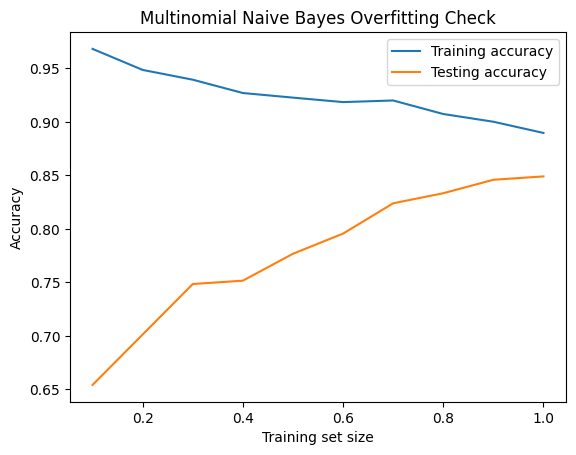

In [13]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_acc = []
test_acc = []
for train_size in train_sizes:
    train_size = int(train_size * X_train.shape[0])
    X_train_subset = X_train[:train_size]
    y_train_subset = Y_train[:train_size]
    clf = MultinomialNB()
    clf.fit(X_train_subset, y_train_subset)
    train_acc.append(clf.score(X_train_subset, y_train_subset))
    test_acc.append(clf.score(X_test, Y_test))

# Plot the accuracy on the training and testing sets as a function of the training set size
plt.plot(train_sizes, train_acc, label='Training accuracy')
plt.plot(train_sizes, test_acc, label='Testing accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Multinomial Naive Bayes Overfitting Check')
plt.legend()
plt.show()


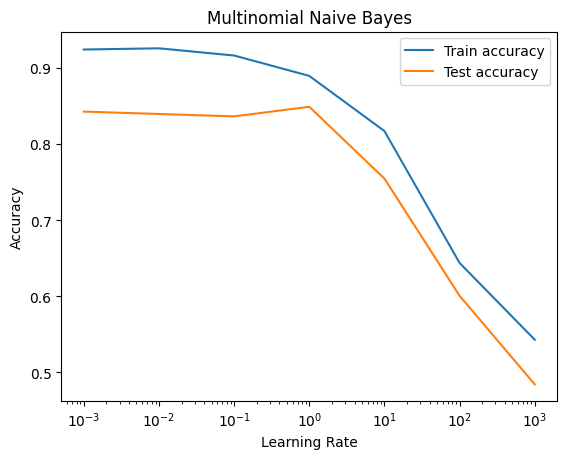

In [14]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for alpha in alphas:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)


plt.plot(alphas, train_scores, label='Train accuracy')
plt.plot(alphas, test_scores, label='Test accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Multinomial Naive Bayes')
plt.legend()
plt.show()

